In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.eddy_feedback as ef 
import functions.plotting as plot 
import functions.data_wrangling as data 
import functions.aos_functions as aos

In [2]:
ds1 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/era_int_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds2 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/jra55_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})
ds3 = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/srip_datasets/ncep_ncar_TEM_ubar_div1.nc',
                        parallel=True, chunks={'time':31})

# data missing at 1000hPa, cut out
ds1 = ds1.where(ds1.pressure < 1000, drop=True)
ds2 = ds2.where(ds2.pressure < 1000, drop=True)
ds3 = ds3.where(ds3.pressure < 1000, drop=True)

In [3]:
ds1 

<xarray.Dataset>
Dimensions:   (time: 456, pressure: 21, latitude: 73)
Coordinates:
  * time      (time) datetime64[ns] 1979-01-14T09:00:00 ... 2016-12-14T09:00:00
  * pressure  (pressure) float32 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * latitude  (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
Data variables:
    ubar      (time, pressure, latitude) float32 dask.array<chunksize=(31, 21, 73), meta=np.ndarray>
    div1_pr   (time, pressure, latitude) float32 dask.array<chunksize=(31, 21, 73), meta=np.ndarray>
    div1_qg   (time, pressure, latitude) float32 dask.array<chunksize=(31, 21, 73), meta=np.ndarray>

Seasonal data has been calculated for 1979-2015.

The JRA55 NH Winter EFP = 0.47


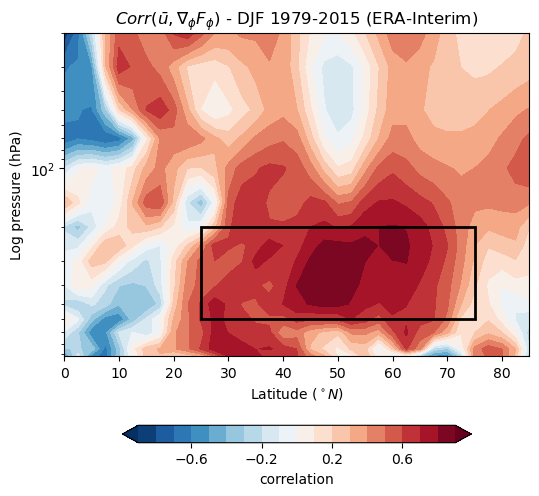

In [4]:
efp_era = ef.calculate_efp(ds1, check_variables=True, flip_level=True)
print(f'The JRA55 NH Winter EFP = {efp_era.values.round(2)}')

plot.plot_reanalysis_correlation(ds1, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (ERA-Interim)')

Seasonal data has been calculated for 1979-2015.

The JRA55 NH Winter EFP = 0.47


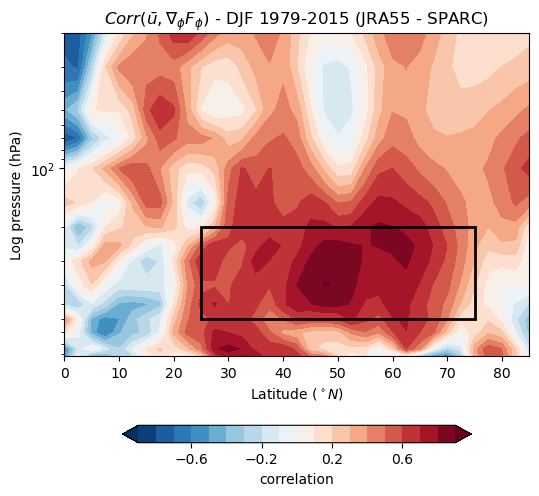

In [5]:
efp_jra = ef.calculate_efp(ds2, check_variables=True, flip_level=True)
print(f'The JRA55 NH Winter EFP = {efp_jra.values.round(2)}')

plot.plot_reanalysis_correlation(ds2, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (JRA55 - SPARC)')

Seasonal data has been calculated for 1979-2015.

The JRA55 NH Winter EFP = 0.45


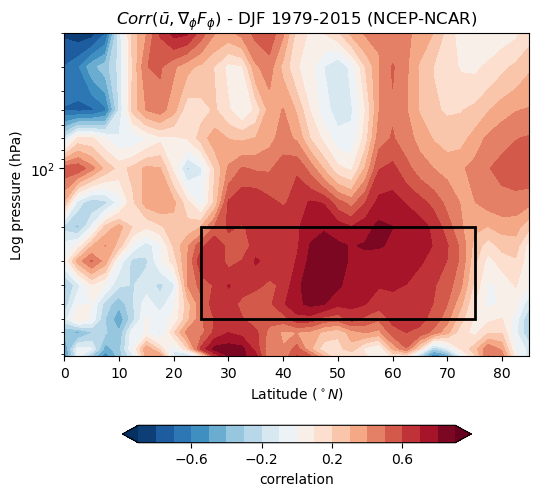

In [6]:
efp_ncep = ef.calculate_efp(ds3, check_variables=True, flip_level=True)
print(f'The JRA55 NH Winter EFP = {efp_ncep.values.round(2)}')

plot.plot_reanalysis_correlation(ds3, check_variables=True, top_atmos=20., cut_poles=True,
                                 label='DJF 1979-2015 (NCEP-NCAR)')

In [7]:
jra = xr.open_mfdataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/seasonal/jra55_seasonal-djf_uvtw_ubar_ep-pr.nc') 
jra 

<xarray.Dataset>
Dimensions:  (time: 58, level: 37, lat: 73, lon: 144)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * time     (time) datetime64[ns] 1958-12-01 1959-12-01 ... 2015-12-01
Data variables:
    u        (time, level, lat, lon) float32 dask.array<chunksize=(58, 37, 73, 144), meta=np.ndarray>
    v        (time, level, lat, lon) float32 dask.array<chunksize=(58, 37, 73, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 dask.array<chunksize=(58, 37, 73, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 dask.array<chunksize=(58, 37, 73, 144), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(58, 37, 73), meta=np.ndarray>
    ep1      (time, level, lat) float64 dask.array<chunksize=(58, 37, 73), meta=np.ndarray>
    ep2      (time, level, lat) float64 dask.array<chunksize=(58, 37, 73), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(58, 37, 73), meta=np.ndarray>
    div2     (time, level, lat) float64 dask.array<chunksize=(58, 37, 73), meta=np.ndarray>

Seasonal data has been calculated for 1979-2015.

The JRA55 NH Winter EFP = 0.4


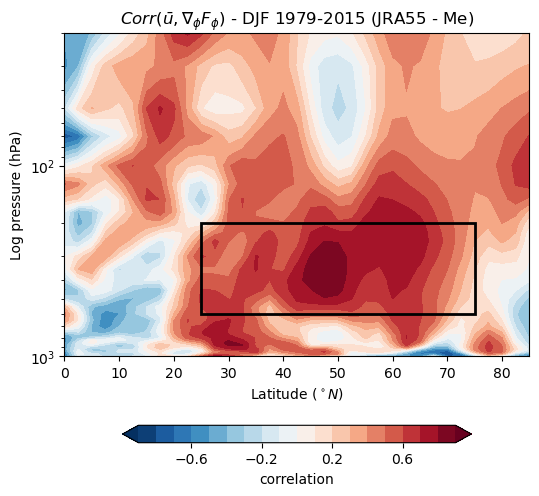

In [11]:
efp_jra55 = ef.calculate_efp(jra, which_div1='div1', take_level_mean=True, flip_latitude=True)
print(f'The JRA55 NH Winter EFP = {efp_jra55.values.round(2)}')

plot.plot_reanalysis_correlation(jra, which_div1='div1', cut_poles=True, top_atmos=20.,
                                 label='DJF 1979-2015 (JRA55 - Me)')